In [1]:
import pandas as pd 
import numpy as np 
import re 
from unidecode import unidecode 
from collections import defaultdict


In [59]:

df = pd.read_csv(r"C:\Users\micha\PycharmProjects\Charts_project\datasets\Lyrics_8842_on_process.csv", usecols=['uri','primary_artists','featuring_artists','track_name','lyrics','langue'])
df.head(10)

,uri,primary_artists,featuring_artists,track_name,lyrics,langue
0,0gLFuoDun2yzBp67btvQU3,Imagine Dragons,NaN,Wrecked,"Days pass by, and my eyes, they dry, and I thi...",en
1,0gMywbX34eJ7W8RW7i2Qo3,Aya Nakamura,NaN,Ça fait mal,aya nakamura\n eh\nte as tout tente je ai tout...,fr
2,0gn0krlJTSSZvnMxh2ITHY,Sofiane,NaN,Mon p'tit loup,je vais te ouvrir les portes les portes de le ...,fr
3,0GN6DWiR9Pf2su3vJF5c0x,SCH,NaN,R.A.C.,ouais ouais\npas deux de mon espece pas trop d...,fr
4,0gn93i7HJt0calph67R5Wu,HUGEL,Amber Van Day,WTF,"Ba-rah, ba-ra-rah, bum-bum, ba-da\nBa-rah, ba-...",en
5,0goer5e8B6SJaTV2B51k6f,Jul,NaN,La bandite,on n'aime pas les putos les moutons les matons...,fr
6,0gplL1WMoJ6iYaPgMCL0gX,Adele,NaN,Easy On Me,There ain't no gold in this river\nThat I've b...,en
7,0gpZwVDOcUiyZ0C4rJbzWt,Jul,Fianso,Tout grailler,fuck les tres puntos fuck et ouais le epoque e...,fr
8,0GQ5bFTVFFKpwNPc7KwQnB,Eminem,"Royce Da 5'9"",You Gon’ Learn """,NaN,Tan tan tan tann album nan!\nTann album nan!\n...,ethnic
9,0gqN3L5zAYN3OFHUB1g6QO,Luv Resval,NaN,"MPC, Part II",lahlata lahlata\nyeah yeah yeah yeah\naa\ncees...,fr


In [3]:
# df.to_csv("datasets/Lyrics_8842_on_process.csv", index = False, encoding="UTF-8")

# functions to count letters, words, and occurrence of unique words :

* count sentences :

In [4]:
text_test = """je vais te ouvrir les portes les portes de le equipe!
FREROT si ?te assumes te (inquiete) pas pour le oseille
on a perdu une tonne on va se refaire vite,
ho ha yeah han eh he ah ha
une sortie    ba-ra-rah,   du veneze  deux contacts a marseille
putain nigga shot shoot fuckin fucking fight Motherfucker fucker 
une sortie du veneze  deux contacts a marseille"""
print(text_test)

je vais te ouvrir les portes les portes de le equipe!
FREROT si ?te assumes te (inquiete) pas pour le oseille
on a perdu une tonne on va se refaire vite,
ho ha yeah han eh he ah ha
une sortie    ba-ra-rah,   du veneze  deux contacts a marseille
putain nigga shot shoot fuckin fucking fight Motherfucker fucker 
une sortie du veneze  deux contacts a marseille


* clean punctuations <span style="color: red;">(code working)</span>

In [58]:
def clean_punctuation(text):
    onomat = """ho ha yeah han eh he uh hu uuh huu ah ha hey yea ooh oh oo Ba-rah, ba-ra-rah, bum-bum, ba-da oh hahaha ahh ahhh na nan ouais wow ouah whoop zgrr, pa ohhh oh paw grr
he paw, grr, paw, paw"""
    list_onomat = onomat.replace(",",'').replace('-',' ').split()

    # Remove punctuation and convert text to lowercase
    text_without_punctuation = re.sub(r'[^\w\s]', ' ', text).lower()

    # Split text into lines
    lines = text_without_punctuation.splitlines()

    clean_sentences = []
    for line in lines:
        # Split line into words
        words = line.split()

        # Remove onomatopoeic words
        words = [word for word in words if word not in list_onomat]

        # Join words back into a cleaned sentence
        cleaned_sentence = ' '.join(words)

        # Add cleaned sentence to the list if not empty
        if cleaned_sentence.strip():  # Check if the cleaned sentence is not empty
            clean_sentences.append(cleaned_sentence)

    # Join cleaned sentences with newline characters
    cleaned_text = "\n".join(clean_sentences)

    return cleaned_text


* count sentences <span style="color: red;">(code working)</span>

In [6]:
def count_sentences(text):
    splited = clean_punctuation(text).splitlines()
    return len(splited)

* count words <span style="color: red;">(code working)</span>

In [7]:
def count_words(text):
    splited = clean_punctuation(text).splitlines()
    agg_lines = " ".join(splited)
    full_words = agg_lines.split()
    return len(full_words)

* count letters <span style="color: red;">(code working)</span>

In [8]:
def count_letters(text):
    splited = clean_punctuation(text).splitlines()
    agg_lines = "".join(splited).replace(' ','')
    # print(agg_lines)
    return len(agg_lines)

* count occurrence of unique words sorted descending <span style="color: red;">(code working)</span>

In [9]:
def count_words_occurrence(text):
    # Replace punctuations with space and convert text to lower case
    unsplitted = clean_punctuation(text).splitlines()
    varchar = ' '.join(unsplitted)
    
    # Initialize defaultdict to store word occurrences
    occurrence = defaultdict(int)
    all_listed_words = varchar.split()
    
    # Count each word's occurrence
    for word in all_listed_words:
        occurrence[word] += 1
    
    # Sort the dictionary by values in descending order
    sorted_occurrence = dict(sorted(occurrence.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_occurrence

* function that count explicit words

In [60]:
def count_explicit(text):
    explicit_words = """sucker suck sucks kalash glock gang gangs cagoule cagoules armes arme shag balles bamme chargeur charguers petard positions position snitch poucaves shooter shoote shootes fuck pute putos flingue stupe stupes suce suces pipe pipes coke drogue drug fesses fesse flingues putain cartel cartels niquer niques teub bedo teubs bedos
    nigga shot shoot fuckin fucking fight Motherfucker fucker dick pussy glock kill nigger nigga nigg blunt gun nig negro Asshole fume fumes tabasse tabasser tabasses bigo bigos
    frerot shit bitch ass bum nique couille couilles chatte tocard encule salope salaud foutre zob zeub batard connard connase connasses connards shlags shlag"""
    explicit_list = explicit_words.split()

    splited = clean_punctuation(text).splitlines()
    agg_lines = " ".join(splited)
    full_words = agg_lines.split()

    count = 0
    for loop in range(len(full_words)):
        if full_words[loop] in explicit_list :
            count +=1

    percentage_of_vulgarity = round(count/len(full_words)*100,2)
    return f"vulgarity : {percentage_of_vulgarity} %",f"{count} words"


# <span style="color: green;">APPLY FUNCTIONS TO LYRICS ON DATAFRAME</span>

In [11]:
df_unit = df.loc[20:40]

In [ ]:
df_unit['lyrics_clean'] = df_unit['lyrics'].apply(clean_punctuation)
df_unit['nb_sentences'] = df_unit['lyrics_clean'].apply(count_sentences)
df_unit['nb_words'] = df_unit['lyrics_clean'].apply(count_words)
df_unit['nb_letters'] = df_unit['lyrics_clean'].apply(count_letters)
df_unit['count_occurence'] = df_unit['lyrics_clean'].apply(count_words_occurrence)
df_unit['count_explicit'] = df_unit['lyrics_clean'].apply(count_explicit)

# analysing letters count to see outliers :

In [13]:
import seaborn as sns

In [61]:
df['lyrics_clean'] = df['lyrics'].apply(clean_punctuation)
df['nb_sentences'] = df['lyrics_clean'].apply(count_sentences)
df['nb_words'] = df['lyrics_clean'].apply(count_words)
df['nb_letters'] = df['lyrics_clean'].apply(count_letters)
df['count_occurence'] = df['lyrics_clean'].apply(count_words_occurrence)
df['count_explicit'] = df['lyrics_clean'].apply(count_explicit)
display(df)

,uri,primary_artists,featuring_artists,track_name,lyrics,langue,lyrics_clean,nb_sentences,nb_words,nb_letters,count_occurence,count_explicit
0,0gLFuoDun2yzBp67btvQU3,Imagine Dragons,NaN,Wrecked,"Days pass by, and my eyes, they dry, and I thi...",en,days pass by and my eyes they dry and i think ...,51,438,1509,"{'i': 46, 'you': 29, 'that': 16, 'm': 13, 'the...","(vulgarity : 0.23 %, 1 words)"
1,0gMywbX34eJ7W8RW7i2Qo3,Aya Nakamura,NaN,Ça fait mal,aya nakamura\n eh\nte as tout tente je ai tout...,fr,aya nakamura\nte as tout tente je ai tout cram...,55,418,1441,"{'ca': 35, 'fait': 35, 'mal': 35, 'me': 34, 'j...","(vulgarity : 0.0 %, 0 words)"
2,0gn0krlJTSSZvnMxh2ITHY,Sofiane,NaN,Mon p'tit loup,je vais te ouvrir les portes les portes de le ...,fr,je vais te ouvrir les portes les portes de le ...,49,512,1841,"{'mon': 46, 'tit': 46, 'loup': 46, 'pe': 45, '...","(vulgarity : 0.59 %, 3 words)"
3,0GN6DWiR9Pf2su3vJF5c0x,SCH,NaN,R.A.C.,ouais ouais\npas deux de mon espece pas trop d...,fr,pas deux de mon espece pas trop dans mon espac...,47,563,2182,"{'je': 39, 'te': 24, 'pas': 17, 'la': 15, 'le'...","(vulgarity : 2.13 %, 12 words)"
4,0gn93i7HJt0calph67R5Wu,HUGEL,Amber Van Day,WTF,"Ba-rah, ba-ra-rah, bum-bum, ba-da\nBa-rah, ba-...",en,we gonna make the girls dance\nain t lookin fo...,40,296,1037,"{'the': 23, 'you': 20, 'what': 14, 'fuck': 13,...","(vulgarity : 4.39 %, 13 words)"
...,...,...,...,...,...,...,...,...,...,...,...,...
8837,1WSGTYKLEpKfNQYYW5Oymt,benny blanco,"Selena Gomez, J Balvin, Tainy",I Can’t Get Enough,"… Crazy\nI like that, you like that, so let's ...",mixed,crazy\ni like that you like that so let s be c...,43,297,1043,"{'i': 22, 'can': 17, 't': 16, 'get': 14, 'enou...","(vulgarity : 0.34 %, 1 words)"
8838,1WxduRqYnmTCTsq0Vd4Npw,DA Uzi,Maes,Le dire,"La vie est belle, j'ai peur d'le dire\nLa vie ...",fr,la vie est belle j ai peur d le dire\nla vie e...,58,679,2284,"{'j': 42, 'la': 21, 'est': 20, 'ai': 19, 'd': ...","(vulgarity : 0.59 %, 4 words)"
8839,1YNQscOx6OqBQjxgJVhEeW,Rita Ora,"Bebe Rexha, Charli XCX, Cardi B",Girls,"Her name is Lara, we learned a lot, ah\nHow to...",en,her name is lara we learned a lot\nhow to do i...,56,436,1587,"{'girls': 49, 'i': 35, 'just': 17, 'wanna': 14...","(vulgarity : 0.0 %, 0 words)"
8840,1ysxnhPXUotZV9Ad2I2VTV,Doums,Freeze corleone,90',"\nJ'bois le pur et par double, j'vois des pute...",fr,j bois le pur et par double j vois des putes d...,50,586,2099,"{'j': 27, 'des': 21, 'l': 17, 'comme': 16, 'da...","(vulgarity : 0.17 %, 1 words)"


In [12]:
df = df.drop(columns='lyrics')

* import stopwords in french :

In [62]:
french_songs = df.query(f"langue == 'fr'")
english_songs = df.query(f"langue == 'en'")
display(english_songs)

,uri,primary_artists,featuring_artists,track_name,lyrics,langue,lyrics_clean,nb_sentences,nb_words,nb_letters,count_occurence,count_explicit
0,0gLFuoDun2yzBp67btvQU3,Imagine Dragons,NaN,Wrecked,"Days pass by, and my eyes, they dry, and I thi...",en,days pass by and my eyes they dry and i think ...,51,438,1509,"{'i': 46, 'you': 29, 'that': 16, 'm': 13, 'the...","(vulgarity : 0.23 %, 1 words)"
4,0gn93i7HJt0calph67R5Wu,HUGEL,Amber Van Day,WTF,"Ba-rah, ba-ra-rah, bum-bum, ba-da\nBa-rah, ba-...",en,we gonna make the girls dance\nain t lookin fo...,40,296,1037,"{'the': 23, 'you': 20, 'what': 14, 'fuck': 13,...","(vulgarity : 4.39 %, 13 words)"
6,0gplL1WMoJ6iYaPgMCL0gX,Adele,NaN,Easy On Me,There ain't no gold in this river\nThat I've b...,en,there ain t no gold in this river\nthat i ve b...,33,217,702,"{'i': 19, 'to': 12, 'me': 9, 't': 8, 'in': 6, ...","(vulgarity : 0.0 %, 0 words)"
23,0HaRLPnr887lcQM2YQzkff,Burna Boy,Ed Sheeran,For My Hand,I wanna be in your life until the night is ove...,en,i wanna be in your life until the night is ove...,34,342,1182,"{'you': 30, 'i': 22, 'my': 20, 'hand': 17, 'fo...","(vulgarity : 0.0 %, 0 words)"
29,0heeNYlwOGuUSe7TgUD27B,Taylor Swift,NaN,Question...?,"I remember\nGood girl, sad boy\nBig city, wron...",en,i remember\ngood girl sad boy\nbig city wrong ...,58,425,1597,"{'you': 36, 'i': 14, 'a': 14, 'did': 13, 'of':...","(vulgarity : 1.18 %, 5 words)"
...,...,...,...,...,...,...,...,...,...,...,...,...
8829,4b4KcovePX8Ke2cLIQTLM0,The Vamps,Matoma,All Night,"\nI've been up all night, no sleep\n'Cause I f...",en,i ve been up all night no sleep\ncause i feel ...,40,313,1055,"{'i': 44, 'm': 18, 'cause': 12, 'feel': 12, 'l...","(vulgarity : 0.0 %, 0 words)"
8830,4bArJbevzjgIfbPupg9GEl,Jain,NaN,The Fool,\nWalking on a wire\nFrom Earth to Venus groun...,en,walking on a wire\nfrom earth to venus ground\...,32,192,701,"{'a': 14, 'i': 14, 'm': 11, 'the': 10, 'on': 6...","(vulgarity : 0.0 %, 0 words)"
8834,4dASQiO1Eoo3RJvt74FtXB,Lil Wayne,"Wiz Khalifa, Imagine Dragons, X Ambassadors...",Sucker for Pain,\ntake my hand through the flames\n(I torture ...,en,take my hand through the flames\ni torture you...,74,662,2386,"{'i': 46, 'the': 24, 'a': 23, 'pain': 18, 'beg...","(vulgarity : 1.96 %, 13 words)"
8839,1YNQscOx6OqBQjxgJVhEeW,Rita Ora,"Bebe Rexha, Charli XCX, Cardi B",Girls,"Her name is Lara, we learned a lot, ah\nHow to...",en,her name is lara we learned a lot\nhow to do i...,56,436,1587,"{'girls': 49, 'i': 35, 'just': 17, 'wanna': 14...","(vulgarity : 0.0 %, 0 words)"


In [69]:


def remove_stop_words(word, language):
    if language == 'fr':
        stop_path = r"C:\Users\micha\PycharmProjects\Charts_project\stop_words\stop_words_french.txt"
        with open(stop_path,'r', encoding='UTF-8') as file:
            fr_stop_words = file.read()
        set_stop = set(unidecode(fr_stop_words).split())
        list_stop = list(set_stop)

        list_sentences = word.splitlines()
        full_sentences = ' '.join(list_sentences)

        list_words = full_sentences.split()

        filtered_words = [unidecode(char) for char in list_words if unidecode(char) not in list_stop]
        return ' '.join(filtered_words)
    elif language == 'en':
        stop_path = r"C:\Users\micha\PycharmProjects\Charts_project\stop_words\stop_words_english.txt"
        with open(stop_path,'r', encoding='UTF-8') as file:
            en_stop_words = file.read()
        set_stop = set(unidecode(en_stop_words).split())
        list_stop = list(set_stop)

        list_sentences = word.splitlines()
        full_sentences = ' '.join(list_sentences)

        list_words = full_sentences.split()

        filtered_words = [unidecode(char) for char in list_words if unidecode(char) not in list_stop]
        return ' '.join(filtered_words)
    else :
        return None


df['word_cloud'] = df.apply(lambda rows : remove_stop_words(rows['lyrics_clean'], rows['langue']), axis = 1)
df




,uri,primary_artists,featuring_artists,track_name,lyrics,langue,lyrics_clean,nb_sentences,nb_words,nb_letters,count_occurence,count_explicit,word_cloud
0,0gLFuoDun2yzBp67btvQU3,Imagine Dragons,NaN,Wrecked,"Days pass by, and my eyes, they dry, and I thi...",en,days pass by and my eyes they dry and i think ...,51,438,1509,"{'i': 46, 'you': 29, 'that': 16, 'm': 13, 'the...","(vulgarity : 0.23 %, 1 words)",days pass eyes dry conversation fading smile w...
1,0gMywbX34eJ7W8RW7i2Qo3,Aya Nakamura,NaN,Ça fait mal,aya nakamura\n eh\nte as tout tente je ai tout...,fr,aya nakamura\nte as tout tente je ai tout cram...,55,418,1441,"{'ca': 35, 'fait': 35, 'mal': 35, 'me': 34, 'j...","(vulgarity : 0.0 %, 0 words)",aya nakamura tente crame laisser tomber joues ...
2,0gn0krlJTSSZvnMxh2ITHY,Sofiane,NaN,Mon p'tit loup,je vais te ouvrir les portes les portes de le ...,fr,je vais te ouvrir les portes les portes de le ...,49,512,1841,"{'mon': 46, 'tit': 46, 'loup': 46, 'pe': 45, '...","(vulgarity : 0.59 %, 3 words)",ouvrir portes portes equipe frerot assumes inq...
3,0GN6DWiR9Pf2su3vJF5c0x,SCH,NaN,R.A.C.,ouais ouais\npas deux de mon espece pas trop d...,fr,pas deux de mon espece pas trop dans mon espac...,47,563,2182,"{'je': 39, 'te': 24, 'pas': 17, 'la': 15, 'le'...","(vulgarity : 2.13 %, 12 words)",espece espace face mere messes basses mieux ma...
4,0gn93i7HJt0calph67R5Wu,HUGEL,Amber Van Day,WTF,"Ba-rah, ba-ra-rah, bum-bum, ba-da\nBa-rah, ba-...",en,we gonna make the girls dance\nain t lookin fo...,40,296,1037,"{'the': 23, 'you': 20, 'what': 14, 'fuck': 13,...","(vulgarity : 4.39 %, 13 words)",gonna girls dance lookin enemies playin nice t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,1WSGTYKLEpKfNQYYW5Oymt,benny blanco,"Selena Gomez, J Balvin, Tainy",I Can’t Get Enough,"… Crazy\nI like that, you like that, so let's ...",mixed,crazy\ni like that you like that so let s be c...,43,297,1043,"{'i': 22, 'can': 17, 't': 16, 'get': 14, 'enou...","(vulgarity : 0.34 %, 1 words)",None
8838,1WxduRqYnmTCTsq0Vd4Npw,DA Uzi,Maes,Le dire,"La vie est belle, j'ai peur d'le dire\nLa vie ...",fr,la vie est belle j ai peur d le dire\nla vie e...,58,679,2284,"{'j': 42, 'la': 21, 'est': 20, 'ai': 19, 'd': ...","(vulgarity : 0.59 %, 4 words)",vie belle vie belle anh champagne terrasse ent...
8839,1YNQscOx6OqBQjxgJVhEeW,Rita Ora,"Bebe Rexha, Charli XCX, Cardi B",Girls,"Her name is Lara, we learned a lot, ah\nHow to...",en,her name is lara we learned a lot\nhow to do i...,56,436,1587,"{'girls': 49, 'i': 35, 'just': 17, 'wanna': 14...","(vulgarity : 0.0 %, 0 words)",lara learned lot sided open minded 50 50 gonna...
8840,1ysxnhPXUotZV9Ad2I2VTV,Doums,Freeze corleone,90',"\nJ'bois le pur et par double, j'vois des pute...",fr,j bois le pur et par double j vois des putes d...,50,586,2099,"{'j': 27, 'des': 21, 'l': 17, 'comme': 16, 'da...","(vulgarity : 0.17 %, 1 words)",bois pur double putes partout squelettiques gr...


In [70]:
df = df.drop(columns=['lyrics','lyrics_clean', 'count_occurence'])

In [80]:
df['percent_explicit'] = df['count_explicit'].astype(str).apply(lambda x : x.split(",")[0].split(":")[1].replace(" %'",'')).astype(float)
df['nb_explicit_words'] = df['count_explicit'].astype(str).apply(lambda x : x.split(",")[1].split()[0].replace("'",'')).astype(int)
df

,uri,primary_artists,featuring_artists,track_name,langue,nb_sentences,nb_words,nb_letters,count_explicit,word_cloud,percent_explicit,nb_explicit_words
0,0gLFuoDun2yzBp67btvQU3,Imagine Dragons,NaN,Wrecked,en,51,438,1509,"(vulgarity : 0.23 %, 1 words)",days pass eyes dry conversation fading smile w...,0.23,1
1,0gMywbX34eJ7W8RW7i2Qo3,Aya Nakamura,NaN,Ça fait mal,fr,55,418,1441,"(vulgarity : 0.0 %, 0 words)",aya nakamura tente crame laisser tomber joues ...,0.00,0
2,0gn0krlJTSSZvnMxh2ITHY,Sofiane,NaN,Mon p'tit loup,fr,49,512,1841,"(vulgarity : 0.59 %, 3 words)",ouvrir portes portes equipe frerot assumes inq...,0.59,3
3,0GN6DWiR9Pf2su3vJF5c0x,SCH,NaN,R.A.C.,fr,47,563,2182,"(vulgarity : 2.13 %, 12 words)",espece espace face mere messes basses mieux ma...,2.13,12
4,0gn93i7HJt0calph67R5Wu,HUGEL,Amber Van Day,WTF,en,40,296,1037,"(vulgarity : 4.39 %, 13 words)",gonna girls dance lookin enemies playin nice t...,4.39,13
...,...,...,...,...,...,...,...,...,...,...,...,...
8837,1WSGTYKLEpKfNQYYW5Oymt,benny blanco,"Selena Gomez, J Balvin, Tainy",I Can’t Get Enough,mixed,43,297,1043,"(vulgarity : 0.34 %, 1 words)",None,0.34,1
8838,1WxduRqYnmTCTsq0Vd4Npw,DA Uzi,Maes,Le dire,fr,58,679,2284,"(vulgarity : 0.59 %, 4 words)",vie belle vie belle anh champagne terrasse ent...,0.59,4
8839,1YNQscOx6OqBQjxgJVhEeW,Rita Ora,"Bebe Rexha, Charli XCX, Cardi B",Girls,en,56,436,1587,"(vulgarity : 0.0 %, 0 words)",lara learned lot sided open minded 50 50 gonna...,0.00,0
8840,1ysxnhPXUotZV9Ad2I2VTV,Doums,Freeze corleone,90',fr,50,586,2099,"(vulgarity : 0.17 %, 1 words)",bois pur double putes partout squelettiques gr...,0.17,1


In [81]:
df = df.drop(columns='count_explicit')
df.head()

,uri,primary_artists,featuring_artists,track_name,langue,nb_sentences,nb_words,nb_letters,word_cloud,percent_explicit,nb_explicit_words
0,0gLFuoDun2yzBp67btvQU3,Imagine Dragons,NaN,Wrecked,en,51,438,1509,days pass eyes dry conversation fading smile w...,0.23,1
1,0gMywbX34eJ7W8RW7i2Qo3,Aya Nakamura,NaN,Ça fait mal,fr,55,418,1441,aya nakamura tente crame laisser tomber joues ...,0.00,0
2,0gn0krlJTSSZvnMxh2ITHY,Sofiane,NaN,Mon p'tit loup,fr,49,512,1841,ouvrir portes portes equipe frerot assumes inq...,0.59,3
3,0GN6DWiR9Pf2su3vJF5c0x,SCH,NaN,R.A.C.,fr,47,563,2182,espece espace face mere messes basses mieux ma...,2.13,12
4,0gn93i7HJt0calph67R5Wu,HUGEL,Amber Van Day,WTF,en,40,296,1037,gonna girls dance lookin enemies playin nice t...,4.39,13


In [85]:

def replace_language(lang):
    if lang == 'fr':
        return 'french'
    elif lang == 'en':
        return 'english'
    elif lang == 'de':
        return 'german'
    elif lang == 'pt':
        return 'portuguese'
    elif lang == 'es':
        return 'spanish'
    elif lang == 'it':
        return 'italian'
    elif lang == 'ar':
        return 'arab'
    else :
        return lang
    
df['langue_clean'] = df['langue'].apply(replace_language) 
df

,uri,primary_artists,featuring_artists,track_name,langue,nb_sentences,nb_words,nb_letters,word_cloud,percent_explicit,nb_explicit_words,langue_clean
0,0gLFuoDun2yzBp67btvQU3,Imagine Dragons,NaN,Wrecked,en,51,438,1509,days pass eyes dry conversation fading smile w...,0.23,1,english
1,0gMywbX34eJ7W8RW7i2Qo3,Aya Nakamura,NaN,Ça fait mal,fr,55,418,1441,aya nakamura tente crame laisser tomber joues ...,0.00,0,french
2,0gn0krlJTSSZvnMxh2ITHY,Sofiane,NaN,Mon p'tit loup,fr,49,512,1841,ouvrir portes portes equipe frerot assumes inq...,0.59,3,french
3,0GN6DWiR9Pf2su3vJF5c0x,SCH,NaN,R.A.C.,fr,47,563,2182,espece espace face mere messes basses mieux ma...,2.13,12,french
4,0gn93i7HJt0calph67R5Wu,HUGEL,Amber Van Day,WTF,en,40,296,1037,gonna girls dance lookin enemies playin nice t...,4.39,13,english
...,...,...,...,...,...,...,...,...,...,...,...,...
8837,1WSGTYKLEpKfNQYYW5Oymt,benny blanco,"Selena Gomez, J Balvin, Tainy",I Can’t Get Enough,mixed,43,297,1043,None,0.34,1,mixed
8838,1WxduRqYnmTCTsq0Vd4Npw,DA Uzi,Maes,Le dire,fr,58,679,2284,vie belle vie belle anh champagne terrasse ent...,0.59,4,french
8839,1YNQscOx6OqBQjxgJVhEeW,Rita Ora,"Bebe Rexha, Charli XCX, Cardi B",Girls,en,56,436,1587,lara learned lot sided open minded 50 50 gonna...,0.00,0,english
8840,1ysxnhPXUotZV9Ad2I2VTV,Doums,Freeze corleone,90',fr,50,586,2099,bois pur double putes partout squelettiques gr...,0.17,1,french


In [86]:
df = df.drop(columns = 'langue')

In [87]:
df.to_csv("datasets/lyrics_powerbi.csv", index = False, encoding = 'utf-8')

In [15]:
df_test = df.query(f"langue != 'instrumental' and langue != 'ar' and langue != 'asian'")

<Axes: xlabel='nb_sentences', ylabel='nb_words'>

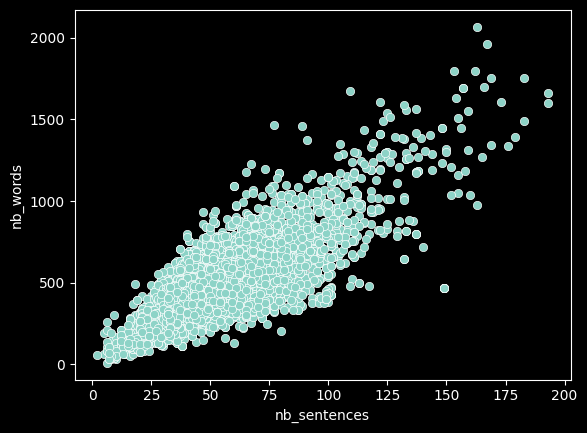

In [16]:
sns.scatterplot(df_test, x='nb_sentences', y="nb_words")

In [17]:
query = df_test.query(f"nb_sentences < 5").sort_values(by='nb_words')
query

,uri,primary_artists,featuring_artists,track_name,lyrics,langue,lyrics_clean,nb_sentences,nb_words,nb_letters,count_occurence,count_explicit
4702,1jjUu75gmHSByieNelPqWi,Dinos,NaN,Rive Droite,le hiver\nvous etes sur le point de etre temoi...,fr,le hiver\nvous etes sur le point de etre temoi...,2,54,226,"{'de': 5, 'le': 4, 'perdu': 2, 'la': 2, 'entre...","(vulgarity : 0.0 %, 0 words)"
